# Programación para *Data Science*

Unidad 7: Análisis de datos en Python - Ejercicios para practicar
------------------------------------------------------

   ## Ejercicio 1

Cargad el conjunto de datos Iris incorporado en la librería `sklearn`.  Implementad una función, `describe_iris`, que devuelva un diccionario con la siguiente estructura: 
```
{
   "categorias": [],
   "atributos": [],
   "num_muestras": 0
}
```
*categorias* debe ser un array con el nombre de los **targets** del dataset. *atributos* debe ser un array con el nombre de los **atributos** y finalmente, *num_muestras* debe indicar el número **total de muestras** del dataset. 

In [1]:
# Respuesta

## Ejercicio 2

Representad gráficamente en un scatter plot la longitud de los sépalos frente al ancho de los sépalos. 
Nota: para poder incluir acentos en los textos de las etiquetas o del título del plot, es necesario indicar explícitamente que las cadenas de caracteres son unicode. Podéis hacerlo incluyendo una _u_ delante de las comillas que delimitan la cadena de caracteres.


In [50]:
# Respuesta

## Ejercicio 3

Dividir los datos Iris en dos subconjuntos, datos de entrenamiento y test, en una proporción 70% entrenamiento y 30% test.

In [12]:
# Respuesta

## Ejercicios para la PEC

A continuación encontraréis los ejercicios que debéis completar en esta PEC y que forman parte de la evaluación de esta unidad. Estos ejercicios utilizarán el conjunto de datos Iris, que habéis cargado y utilizado los ejercicios preliminares de esta PEC.  

## Pregunta 1

Enumera 3 algoritmos basado en el aprendizaje supervisado y describe, en grandes rasgos, como funciona uno de ellos. Recordad que es necesario citar las referencias consultadas para responder la pregunta, y que la respuesta que proporcionéis tiene que ser original (redactada por vosotros mismos, después de haber leído y entendido las referencias que consideréis oportunas). **(1 punto)**

In [2]:
# Respuesta

## Pregunta 2

Define la validación de un modelo basado en _Leave One Out_. **(0.5 puntos)**

In [ ]:
# Respuesta

## Ejercicio 1

Representad mediante [violinplot](https://en.wikipedia.org/wiki/Violin_plot) cómo varían la longitud y el ancho tanto para los sépalos como para los pétalos según especie. Recordad ajustar los parámetros de la visualización para facilitar la lectura e interpretación de la figura que generéis. **(1,5 puntos)**

Nota: Cread un dataframe con los datos de iris.data y iris.target para plotear violinplot

In [2]:
#Respuesta

## Ejercicio 2

Aplicad el clasificador **KNeighborsClassifier** para predecir el tipo de especie de iris utilizando la longitud y ancho de los pétalos como atributos y utilizando 60% de las muestras de aprendizaje y 40% muestras de test (podéis usar cualquier partición de muestras de aprendizaje y de test).**(Total 2 puntos)**

a) ¿Qué rendimiento se obtiene?**(1,5 puntos)** 

b) Si cambianos la proporción de muestras de entrenamiento y test (10% entrenamiento y 90% test). ¿Existen diferencias en el rendiemiento? En caso afirmativo, ¿por qué? **(0,5 puntos)**

In [3]:
#Respuesta

## Ejercicio 3

Realizad el ejercicio anterior pero aplicando un clasificador basado en un [árbol de decicisión](https://es.wikipedia.org/wiki/Árbol_de_decisión)
para predecir el tipo de especie de iris utilizando la longitud y ancho de los pétalos como atributos y utilizando 60% de las muestras de aprendizaje y 40% muestras de test.¿Qué valor de precisión obtenemos con un modelo basado en un arbol de decisión? **(1,5 puntos)** 

In [1]:
#Respuesta

## Ejercicio 4

Dibujad el árbol de decisión obtenido en el ejercicio 3 y dado un valor de entrada concreto, explicad la predicción obtenida a partir del árbol de decisión.

Nota: Puede ser la función [tree](https://scikit-learn.org/stable/modules/tree.html) de sklearn sea de utilidad.

**(1,5 puntos)**

#### Respuesta:


In [6]:
#Respuesta

## Ejercicio 5

Aplicad el algoritmo de _clustering KMeans_ tal como hemos visto en el Notebook de teoría, pero esta vez utilizando los siguientes parámetros:

```
Número de clusters: 10
Método de inicialización de los puntos centrales: 'random'
Número de iteraciones para la selección de puntos centrales: 5
Algoritmo: 'elkan'
```

Visualizad gráficamente el resultado. Si los datos fuesen [dispersos](https://en.wikipedia.org/wiki/Sparse_matrix), ¿qué opción del parámetro _alg_ de la función _sklearn.cluster.KMeans_ deberíamos utilizar?  **(2 puntos)**

In [7]:
#Respuesta

## Ejercicio Opcional

Modificad la función anterior para realizar _spectral clustering_ con un nombre de clústers igual a 3.  Visualizad gráficamente el resultado coloreando por clase de Iris. 

In [3]:
# Respuesta

## Soluciones a los ejercicios para practicar

   ## Ejercicio 1

Cargad el conjunto de datos Iris incorporado en la librería `sklearn`.  Implementad una función, `describe_iris`, que devuelva un diccionario con la siguiente estructura: 
```
{
   "categorias": [],
   "atributos": [],
   "num_muestras": 0
}
```
*categorias* debe ser un array con el nombre de los **targets** del dataset. *atributos* debe ser un array con el nombre de los **atributos** y finalmente, *num_muestras* debe indicar el número **total de muestras** del dataset. 

In [26]:
from sklearn import datasets

#Cargamos el dataset de iris

iris = datasets.load_iris()

def describe_iris():
    #Inicializamos el diccionario
    diccionario = {}
    #Asignamos a cada atributo el valor correspondiente en base al dataset Iris
    diccionario["categorias"] = iris.target_names
    diccionario["atributos"] = iris.feature_names
    diccionario["num_muestras"] = len(iris.data)
    
    return diccionario

print describe_iris()

{'categorias': array(['setosa', 'versicolor', 'virginica'], dtype='|S10'), 'atributos': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 'num_muestras': 150}


## Ejercicio 2

Representad gráficamente en un scatter plot la longitud de los sépalos frente al ancho de los sépalos. 
Nota: para poder incluir acentos en los textos de las etiquetas o del título del plot, es necesario indicar explícitamente que las cadenas de caracteres son unicode. Podéis hacerlo incluyendo una u delante de las comillas que delimitan la cadena de caracteres.

Text(0,0.5,u'Ancho S\xe9palo')

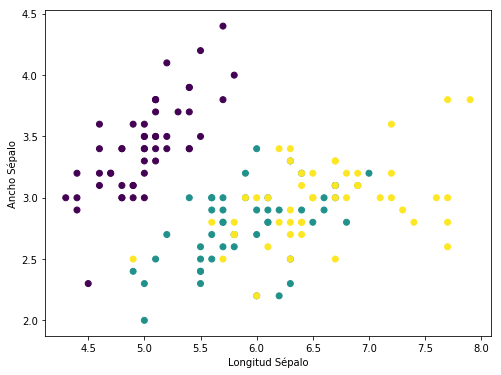

In [39]:
%matplotlib inline

#Importamos las librerías

import matplotlib.pyplot as plt
from sklearn import datasets

# Importamos el dataset

iris=datasets.load_iris()

L_sep = iris.data[:,0]

W_sep= iris.data[:,1]

Y = iris.target

# Creamos la figura

plt.figure(1, figsize=(8,6))

plt.clf()

# Coloreamos utilizando la categoría.

plt.scatter(L_sep,W_sep,c=Y)
plt.xlabel(u'Longitud Sépalo')
plt.ylabel(u'Ancho Sépalo')



## Ejercicio 3

Dividir los datos Iris en dos subconjuntos, datos de entrenamiento y test, en una proporción 70% entrenamiento y 30% test.

In [71]:

from sklearn.model_selection import train_test_split 


iris=datasets.load_iris()

# Dividimos los datos en datos de entrenamiento (70%) y de test (30%) mediante la función train_test_split

train,test = train_test_split(iris.data, test_size=0.3)

# El atributo test_size=0.3 divide los datos en una proporción de 70% y 30%. entrenamiento=70% y test=30%.

print(train.shape)

print(test.shape)

print(test)


(105, 4)
(45, 4)
[[5.4 3.7 1.5 0.2]
 [6.9 3.1 4.9 1.5]
 [5.4 3.9 1.7 0.4]
 [6.5 3.  5.8 2.2]
 [4.6 3.1 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [6.3 3.3 4.7 1.6]
 [5.7 2.8 4.5 1.3]
 [5.8 2.7 3.9 1.2]
 [6.7 2.5 5.8 1.8]
 [6.7 3.3 5.7 2.1]
 [6.4 2.7 5.3 1.9]
 [5.8 2.6 4.  1.2]
 [5.1 2.5 3.  1.1]
 [5.2 3.5 1.5 0.2]
 [6.3 2.5 5.  1.9]
 [6.9 3.2 5.7 2.3]
 [4.8 3.  1.4 0.3]
 [7.2 3.2 6.  1.8]
 [6.7 3.  5.  1.7]
 [6.3 2.9 5.6 1.8]
 [5.  3.2 1.2 0.2]
 [6.1 2.9 4.7 1.4]
 [5.5 4.2 1.4 0.2]
 [6.1 2.8 4.  1.3]
 [6.2 3.4 5.4 2.3]
 [6.3 3.3 6.  2.5]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.  3.5 1.3 0.3]
 [6.5 3.  5.2 2. ]
 [5.  2.  3.5 1. ]
 [5.6 2.5 3.9 1.1]
 [6.1 3.  4.6 1.4]
 [4.4 3.  1.3 0.2]
 [5.5 2.4 3.7 1. ]
 [6.1 2.8 4.7 1.2]
 [6.3 2.3 4.4 1.3]
 [7.7 3.8 6.7 2.2]
 [6.7 3.1 4.7 1.5]
 [5.5 2.3 4.  1.3]
 [6.8 2.8 4.8 1.4]
 [6.5 3.2 5.1 2. ]
 [6.  2.7 5.1 1.6]
 [4.6 3.2 1.4 0.2]]
